In [1]:
import numpy as np
from sklearn import datasets
import pandas as pd
import seaborn as sns

In [2]:
iris = datasets.load_iris()
X = pd.DataFrame(iris.data)
y = iris.target

m, n = X.shape
print(m, n)

150 4


In [3]:
means = X.mean()
means

0    5.843333
1    3.054000
2    3.758667
3    1.198667
dtype: float64

In [4]:
# def mean_normalization(x):
#     for i in range(len(x)):
#         x[i] = x[i] - means[i]
#     return x
    
# XX = X.apply(mean_normalization, axis='columns')

XX = X - means

In [5]:
sigma = 1/(m-1) * np.dot(np.transpose(XX), XX)

In [6]:
sigma

array([[ 0.68569351, -0.03926846,  1.27368233,  0.5169038 ],
       [-0.03926846,  0.18800403, -0.32171275, -0.11798121],
       [ 1.27368233, -0.32171275,  3.11317942,  1.29638747],
       [ 0.5169038 , -0.11798121,  1.29638747,  0.58241432]])

In [7]:
cov_mat = np.cov([XX.iloc[0,:],XX.iloc[1,:],XX.iloc[2,:]], XX.iloc[3, :])
print(cov_mat)

[[1.32431896 1.0863523  1.21380785 1.06647452]
 [1.0863523  0.90421896 1.00584119 0.88184119]
 [1.21380785 1.00584119 1.13663007 1.00596341]
 [1.06647452 0.88184119 1.00596341 0.89529674]]


In [8]:
v, m = np.linalg.eig(sigma)

In [9]:
v

array([4.22484077, 0.24224357, 0.07852391, 0.02368303])

In [10]:
m_pca = m[:, :2]

In [11]:
new_X = np.dot(XX, m_pca)

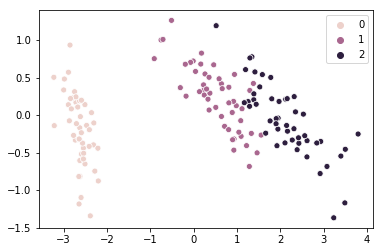

In [12]:
sns.scatterplot(x = new_X[:, 0], y = new_X[:, 1], hue = y)

In [13]:
from sklearn import decomposition

In [14]:
pca = decomposition.PCA(n_components=2)
XXX = pca.fit_transform(X)
pca.get_covariance()

array([[ 0.67919741, -0.03258618,  1.27066452,  0.5321852 ],
       [-0.03258618,  0.18113034, -0.31863564, -0.13363564],
       [ 1.27066452, -0.31863564,  3.11934547,  1.28541527],
       [ 0.5321852 , -0.13363564,  1.28541527,  0.58961806]])

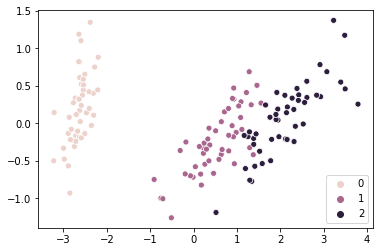

In [15]:
sns.scatterplot(x = XXX[:, 0], y = XXX[:, 1], hue = y)

In [16]:
XXX

array([[-2.68420713,  0.32660731],
       [-2.71539062, -0.16955685],
       [-2.88981954, -0.13734561],
       [-2.7464372 , -0.31112432],
       [-2.72859298,  0.33392456],
       [-2.27989736,  0.74778271],
       [-2.82089068, -0.08210451],
       [-2.62648199,  0.17040535],
       [-2.88795857, -0.57079803],
       [-2.67384469, -0.1066917 ],
       [-2.50652679,  0.65193501],
       [-2.61314272,  0.02152063],
       [-2.78743398, -0.22774019],
       [-3.22520045, -0.50327991],
       [-2.64354322,  1.1861949 ],
       [-2.38386932,  1.34475434],
       [-2.6225262 ,  0.81808967],
       [-2.64832273,  0.31913667],
       [-2.19907796,  0.87924409],
       [-2.58734619,  0.52047364],
       [-2.3105317 ,  0.39786782],
       [-2.54323491,  0.44003175],
       [-3.21585769,  0.14161557],
       [-2.30312854,  0.10552268],
       [-2.35617109, -0.03120959],
       [-2.50791723, -0.13905634],
       [-2.469056  ,  0.13788731],
       [-2.56239095,  0.37468456],
       [-2.63982127,

In [17]:
new_X

array([[-2.68420713, -0.32660731],
       [-2.71539062,  0.16955685],
       [-2.88981954,  0.13734561],
       [-2.7464372 ,  0.31112432],
       [-2.72859298, -0.33392456],
       [-2.27989736, -0.74778271],
       [-2.82089068,  0.08210451],
       [-2.62648199, -0.17040535],
       [-2.88795857,  0.57079803],
       [-2.67384469,  0.1066917 ],
       [-2.50652679, -0.65193501],
       [-2.61314272, -0.02152063],
       [-2.78743398,  0.22774019],
       [-3.22520045,  0.50327991],
       [-2.64354322, -1.1861949 ],
       [-2.38386932, -1.34475434],
       [-2.6225262 , -0.81808967],
       [-2.64832273, -0.31913667],
       [-2.19907796, -0.87924409],
       [-2.58734619, -0.52047364],
       [-2.3105317 , -0.39786782],
       [-2.54323491, -0.44003175],
       [-3.21585769, -0.14161557],
       [-2.30312854, -0.10552268],
       [-2.35617109,  0.03120959],
       [-2.50791723,  0.13905634],
       [-2.469056  , -0.13788731],
       [-2.56239095, -0.37468456],
       [-2.63982127,

In [18]:
from mpl_toolkits.mplot3d import Axes3D

In [20]:
fig = plt.figure(1, figsize=(4, 3))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()

ax.scatter(X.iloc[:, 0], X.iloc[:, 1], X.iloc[:, 2], c=y, cmap=plt.cm.nipy_spectral,
           edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

plt.show()

NameError: name 'plt' is not defined